In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

pd.options.mode.chained_assignment = None

In [3]:
!ls

RV_calculation.ipynb     RV_calculation_new.ipynb raw_data


In [380]:
ibm_df = pd.read_csv("raw_data/3Stocks/IBM_1min.csv")
jnj_df = pd.read_csv("raw_data/3Stocks/JNJ_1min.csv")
wmt_df = pd.read_csv("raw_data/3Stocks/WMT_1min.csv")

In [381]:
ibm_df['Date Time'] = pd.to_datetime(ibm_df['Date Time'])
jnj_df['Date Time'] = pd.to_datetime(jnj_df['Date Time'])
wmt_df['Date Time'] = pd.to_datetime(wmt_df['Date Time'])

In [382]:
ibm_df['Log_Returns'] = np.log(ibm_df['Close'] / ibm_df['Close'].shift(1))
jnj_df['Log_Returns'] = np.log(jnj_df['Close'] / jnj_df['Close'].shift(1))
wmt_df['Log_Returns'] = np.log(wmt_df['Close'] / wmt_df['Close'].shift(1))
ibm_df.dropna(inplace=True)
jnj_df.dropna(inplace=True)
wmt_df.dropna(inplace=True)

In [404]:
ibm_df = ibm_df.iloc[380:]
ibm_df.reset_index(drop=True, inplace=True)

jnj_df = jnj_df.iloc[380:]
jnj_df.reset_index(drop=True, inplace=True)

wmt_df = wmt_df.iloc[380:]
wmt_df.reset_index(drop=True, inplace=True)

In [402]:
observations_per_day = jnj_df.groupby(jnj_df['Date Time'].dt.date).size()

In [403]:
trading_hours = observations_per_day.unique()
trading_hours

array([380, 381])

In [395]:
ibm_df

,Date Time,Open,High,Low,Close,Volume,Date,Time,Log_Returns
0,2010-01-05 09:35:00,84.6767,84.8516,84.6767,84.7415,123004.0,2010-01-05,09:35:00,-0.012680
1,2010-01-05 09:36:00,84.7415,84.7544,84.6638,84.7318,101782.0,2010-01-05,09:36:00,-0.000114
2,2010-01-05 09:37:00,84.7415,84.7933,84.7221,84.7577,30386.0,2010-01-05,09:37:00,0.000306
3,2010-01-05 09:38:00,84.7544,84.7609,84.7091,84.7285,45357.0,2010-01-05,09:38:00,-0.000345
4,2010-01-05 09:39:00,84.7285,84.7285,84.6832,84.7026,37723.0,2010-01-05,09:39:00,-0.000306
...,...,...,...,...,...,...,...,...,...
958210,2019-12-31 15:51:00,114.7837,114.8095,114.7794,114.8095,20723.0,2019-12-31,15:51:00,0.000225
958211,2019-12-31 15:52:00,114.8095,114.8438,114.8052,114.8438,24968.0,2019-12-31,15:52:00,0.000299
958212,2019-12-31 15:53:00,114.8524,114.9038,114.8524,114.9038,39332.0,2019-12-31,15:53:00,0.000522
958213,2019-12-31 15:54:00,114.9038,114.9296,114.8910,114.9038,20436.0,2019-12-31,15:54:00,0.000000


In [394]:
ibm_df = ibm_df.iloc[380:]
ibm_df.reset_index(drop=True, inplace=True)

In [ ]:
380+381+381+381

2010-01-04: 9:36:00 - 15:55:00
2010-01-05: 9:35:00 - 15:55:00
2010-01-06: 9:35:00 - 15:55:00

In [127]:
log_return_mean = ibm_df["Log_Returns"].mean()

In [219]:
ibm_df["mean_deviation"] = ibm_df["Log_Returns"].apply(lambda x: (x - log_return_mean)**2)

In [224]:
ibm_daily_volatility = (ibm_df.groupby(ibm_df['Date Time'].dt.date)["mean_deviation"].sum()/trading_hours)**0.5

In [ ]:
def create_full_image(stock_data):

    df = stock_data

    df['Date Time'] = pd.to_datetime(df['Date Time'])
    ibm_df['Log_Returns'] = np.log(ibm_df['Close'] / ibm_df['Close'].shift(1))

    
    observations_per_day = tmp.groupby(tmp['Date Time'].dt.date).size()
    trading_hours = observations_per_day.unique()[0]

    log_return_mean = ibm_df["Log_Returns"].mean()
    ibm_df["mean_deviation"] = ibm_df["Log_Returns"].apply(lambda x: (x - log_return_mean)**2)

    ibm_daily_volatility = (ibm_df.groupby(ibm_df['Date Time'].dt.date)["mean_deviation"].sum()/trading_hours)**0.5

    

# Data Insights

In [166]:
ibm_df.iloc[794919:794923]

,Date Time,Open,High,Low,Close,Volume,Date,Time,Log_Returns,volaility,volatility
794921,2018-04-18 12:10:00,117.9897,118.0921,117.9579,118.0016,35686.0,2018-04-18,12:10:00,0.000370,0.000370,1.369669e-07
794922,2018-04-18 12:11:00,118.0016,127.7209,117.9897,127.7209,21200.0,2018-04-18,12:11:00,0.079149,0.079149,6.264551e-03
794923,2018-04-18 12:12:00,118.0413,118.0611,118.0055,118.0325,13916.0,2018-04-18,12:12:00,-0.078887,-0.078888,6.223272e-03
794924,2018-04-18 12:13:00,118.0254,118.0611,118.0214,118.0373,12823.0,2018-04-18,12:13:00,0.000041,0.000040,1.628428e-09


In [185]:
ibm_df["Log_Returns"].nlargest(10)

867918    0.080164
794922    0.079149
747522    0.076530
292608    0.048386
587121    0.042518
819150    0.035161
244221    0.034949
33147     0.031170
770763    0.028511
147828    0.027408
Name: Log_Returns, dtype: float64

In [180]:
q_low = jnj_df["Log_Returns"].quantile(0.01)
q_hi  = jnj_df["Log_Returns"].quantile(0.99)

In [181]:
df_filtered = jnj_df[(jnj_df["Log_Returns"] < q_hi) & (jnj_df["Log_Returns"] > q_low)]

(array([  7748.,  17736.,  45394., 115551., 332087., 233255., 116581.,
         45171.,  17995.,   7905.]),
 array([-1.18405736e-03, -9.47071597e-04, -7.10085832e-04, -4.73100066e-04,
        -2.36114300e-04,  8.71465774e-07,  2.37857232e-04,  4.74842997e-04,
         7.11828763e-04,  9.48814529e-04,  1.18580029e-03]),
 <BarContainer object of 10 artists>)

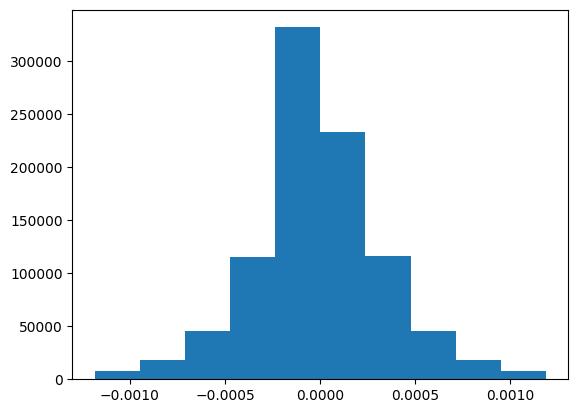

In [184]:
plt.hist(df_filtered["Log_Returns"])

In [178]:
jnj_df["Log_Returns"].nsmallest(20)

540639   -0.102017
858393   -0.040737
858774   -0.029305
913005   -0.029194
776051   -0.027473
483489   -0.026836
32694    -0.025722
160782   -0.025706
698754   -0.024800
51816    -0.024458
101727   -0.022819
575310   -0.021826
867537   -0.021670
676656   -0.021036
176022   -0.020850
913638   -0.020522
939165   -0.020233
542925   -0.019594
76200    -0.019038
162306   -0.018779
Name: Log_Returns, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x357c875e0>,
 'caps': [<matplotlib.lines.Line2D at 0x357c87b20>,
 'boxes': [<matplotlib.lines.Line2D at 0x357c87340>],
 'medians': [<matplotlib.lines.Line2D at 0x357c960a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x357c62b20>],
 'means': []}

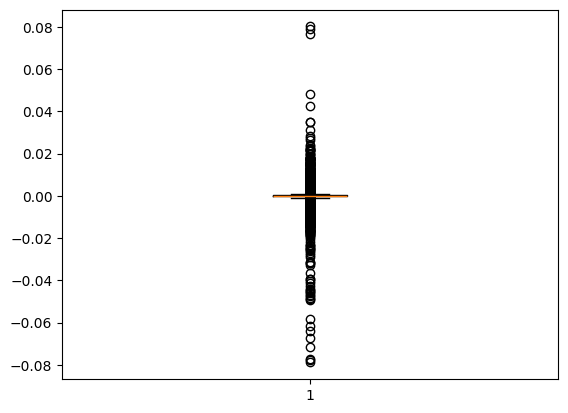

In [158]:
plt.boxplot(ibm_df["Log_Returns"])

(array([6.00000e+00, 6.00000e+00, 1.50000e+01, 3.70000e+01, 8.98795e+05,
        5.96980e+04, 3.10000e+01, 3.00000e+00, 1.00000e+00, 3.00000e+00]),
 array([-0.0788874 , -0.06298231, -0.04707722, -0.03117213, -0.01526703,
         0.00063806,  0.01654315,  0.03244825,  0.04835334,  0.06425843,
         0.08016352]),
 <BarContainer object of 10 artists>)

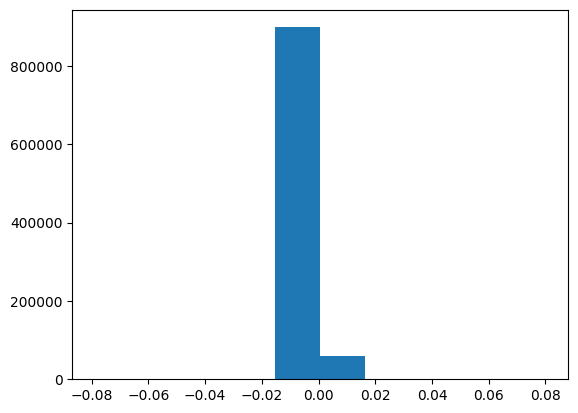

In [143]:
plt.hist(ibm_df["Log_Returns"], bins=10)

In [187]:
daily_log_returns_large = ibm_df.resample('D', on='Date Time').sum()["Log_Returns"]

# Creating image

In [247]:
50*50

2500

In [271]:
ibm_daily_volatility_diff = ibm_daily_volatility.diff().dropna()

In [230]:
mm_scaler_x = MinMaxScaler(feature_range=(-255,255))

In [282]:
pre_scale = np.reshape(ibm_daily_volatility_diff, (-1,1))

In [283]:
pre_scale.shape

(2514, 1)

In [287]:
scaled_daily_vol_dif = mm_scaler_x.fit_transform(pre_scale)

In [120]:
test = np.array([[255,255,0], [255,0,0],[255,0,0], [255,0,0]])

In [406]:
def create_full_image(stock_data):

    df = stock_data
    
    observations_per_day = df.groupby(df['Date Time'].dt.date).size()
    trading_hours = observations_per_day.unique()[0]

    log_return_mean = df["Log_Returns"].mean()
    df["mean_deviation"] = df["Log_Returns"].apply(lambda x: (x - log_return_mean)**2)

    daily_volatility = (df.groupby(df['Date Time'].dt.date)["mean_deviation"].sum()/trading_hours)**0.5

    
    daily_volatility_diff = daily_volatility.diff().dropna()

    pre_scale = np.reshape(daily_volatility_diff, (-1,1))
    
    mm_scaler_x = MinMaxScaler(feature_range=(-255,255))
    scaled_daily_vol_dif = mm_scaler_x.fit_transform(pre_scale)

    return diff_to_rgb(scaled_daily_vol_dif)
    

In [427]:
ibm_daily_volatility[1] - ibm_daily_volatility[0]

/var/folders/31/d9mhbrs95msdp4hzv2wdsc8w0000gn/T/ipykernel_54188/3248897613.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ibm_daily_volatility[1] - ibm_daily_volatility[0]


-0.0003957153558290381

In [423]:
ibm_daily_volatility_diff

Date Time
2010-01-06   -0.000396
2010-01-07    0.000063
2010-01-08   -0.000042
2010-01-11    0.000184
2010-01-12   -0.000027
                ...   
2019-12-24   -0.000105
2019-12-26    0.000041
2019-12-27    0.000043
2019-12-30    0.000116
2019-12-31   -0.000074
Name: mean_deviation, Length: 2514, dtype: float64

In [412]:
tmp = create_full_image(jnj_df)

/var/folders/31/d9mhbrs95msdp4hzv2wdsc8w0000gn/T/ipykernel_54188/2922091584.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  red[i] = np.abs(scaled_daily_vol_dif[i])
/var/folders/31/d9mhbrs95msdp4hzv2wdsc8w0000gn/T/ipykernel_54188/2922091584.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  green[i] = scaled_daily_vol_dif[i]


In [413]:
tmpp = create_full_image(wmt_df)

/var/folders/31/d9mhbrs95msdp4hzv2wdsc8w0000gn/T/ipykernel_54188/2922091584.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  red[i] = np.abs(scaled_daily_vol_dif[i])
/var/folders/31/d9mhbrs95msdp4hzv2wdsc8w0000gn/T/ipykernel_54188/2922091584.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  green[i] = scaled_daily_vol_dif[i]


In [389]:
scaled_daily_vol_dif

array([[-14.95821604],
       [  4.3011659 ],
       [ -0.11080927],
       ...,
       [  3.47530909],
       [  6.50874613],
       [ -1.45429065]])

In [400]:
tmppp

array([[-14.95819664],
       [  4.30119255],
       [ -0.11075902],
       ...,
       [  3.47534403],
       [  6.50871727],
       [ -1.4542032 ]])

In [388]:
tmpp

array([[-15.26949124],
       [-17.61953422],
       [-18.43139359],
       ...,
       [-13.03578816],
       [-23.03874703],
       [-17.41286866]])

In [288]:
red = np.zeros(2514)
green = np.zeros(2514)
blue = np.zeros(2514)

2514

In [371]:
def diff_to_rgb(scaled_daily_vol_dif):

    size = scaled_daily_vol_dif.shape[0]
    
    red = np.zeros(size)
    green = np.zeros(size)
    blue = np.zeros(size)
    
    for i in range(len(scaled_daily_vol_dif)):
        if scaled_daily_vol_dif[i] < 0:
            red[i] = np.abs(scaled_daily_vol_dif[i])
        elif scaled_daily_vol_dif[i] > 0:
            green[i] = scaled_daily_vol_dif[i]
        elif scaled_daily_vol_dif[i] == 0:
            continue
        else:
            print(error)

    image_dim = math.floor(scaled_daily_vol_dif.shape[0]**0.5)

    flat_image = np.column_stack((red, green, blue))

    square_image = flat_image[:image_dim**2].reshape((image_dim, image_dim, 3))
    return square_image

In [320]:
tmp.shape

(958215, 11)

In [321]:
tmp = diff_to_rgb(scaled_daily_vol_dif)

2514
50
(2514, 3)


/var/folders/31/d9mhbrs95msdp4hzv2wdsc8w0000gn/T/ipykernel_54188/3183384418.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  red[i] = np.abs(scaled_daily_vol_dif[i])
/var/folders/31/d9mhbrs95msdp4hzv2wdsc8w0000gn/T/ipykernel_54188/3183384418.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  green[i] = scaled_daily_vol_dif[i]


In [322]:
tmp.shape

(50, 50, 3)

In [292]:
testing = np.column_stack((red, green, blue))

In [311]:
testing.shape

(2514, 3)

In [294]:
reshaped_arr = testing[:50**2].reshape((50, 50, 3))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


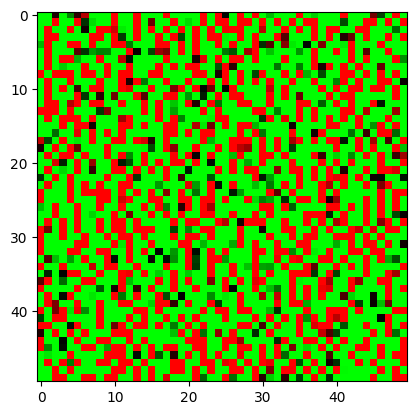

In [421]:
plt.imshow(tmppp)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


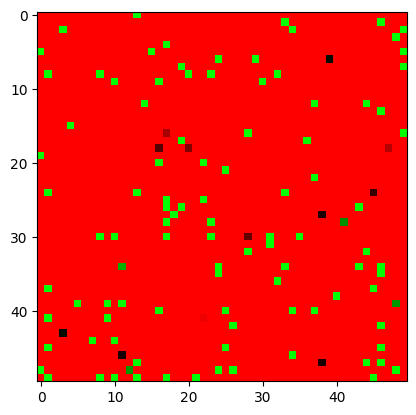

In [417]:
plt.imshow(tmp)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


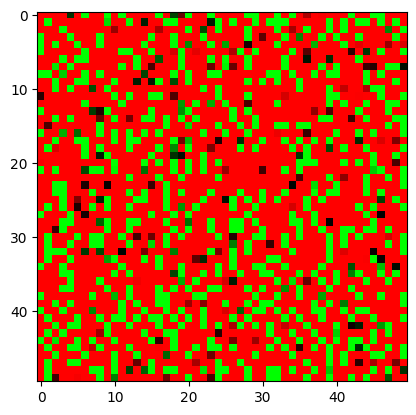

In [415]:
plt.imshow(tmpp)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


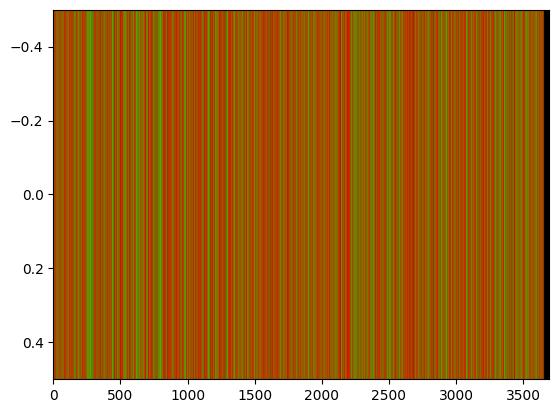

In [22]:
plt.imshow(np.array([testing]), aspect = "auto")

In [23]:
!mkdir "raw_data/images"

In [92]:
tmp = reshaped_arr.astype(np.uint8)

In [89]:
normalized_arr = np.clip(reshaped_arr, 0, 1)

In [96]:
uint8_arr = (normalized_arr * 255).astype(np.uint8)

plt.imsave("raw_data/images/test4.png", uint8_arr)

In [ ]:
reshape

In [95]:
plt.imsave("raw_data/images/test3.png", tmp)

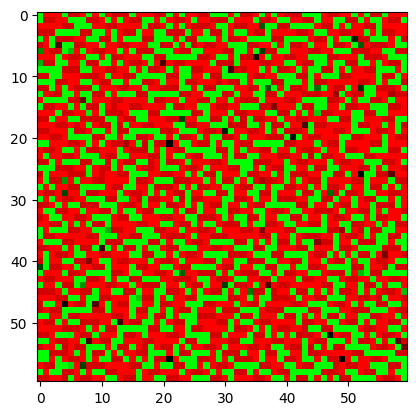

In [98]:
image_data = plt.imread("raw_data/images/test4.png")

# Display the image
plt.imshow(image_data)

In [178]:
np.array([[[255,0,0], [0,255,0], [0,0,255]]]).shape

(1, 3, 3)

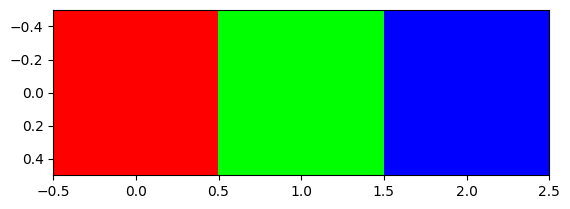

In [167]:
plt.imshow(np.array([[[255,0,0], [0,255,0], [0,0,255]]]))

In [ ]:
a = np.array((1,2,3))
b = np.array((2,3,4))
np.column_stack((a,b))
array([[1, 2],
       [2, 3],
       [3, 4]])

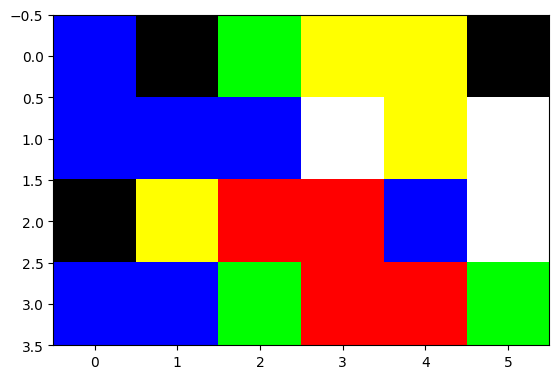

In [38]:
palette = np.array([[255,   0,   0], # index 0: red
                   [  0, 255,   0], # index 1: green
                    [  0,   0, 255], # index 2: blue
                    [255, 255, 255], # index 3: white
                    [  0,   0,   0], # index 4: black
                    [255, 255,   0], # index 5: yellow
                     ], dtype=np.uint8)
     

m, n = 4, 6

indices = np.random.randint(0, len(palette), size=(4, 6))
indices
np.array([[2, 4, 0, 1, 4, 2],
       [1, 1, 5, 5, 2, 0],
       [4, 4, 3, 3, 0, 4],
       [2, 5, 0, 5, 2, 3]])

In [21]: plt.imshow(palette[indices])

In [138]:
palette[indices]

array([[[  0,   0, 255],
        [255, 255,   0],
        [255, 255, 255],
        [  0,   0, 255],
        [255, 255,   0],
        [  0, 255,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0, 255,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [255, 255, 255]],

       [[  0,   0,   0],
        [  0, 255,   0],
        [255, 255,   0],
        [  0,   0,   0],
        [255, 255,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [  0,   0,   0],
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]]], dtype=uint8)

In [98]:
for n in scaled_vol:
    if n == 0:

array([[ 3.27110592e+01],
       [-9.30913652e+01],
       [-5.03688796e+01],
       [-3.89017893e+01],
       [ 4.98603612e+01],
       [-1.16899083e+01],
       [-1.16899083e+01],
       [-7.12925728e+01],
       [ 3.34250181e+01],
       [-1.94283411e+01],
       [ 9.00888991e+01],
       [-4.12873539e+01],
       [-1.16899083e+01],
       [-1.16899083e+01],
       [-1.16899083e+01],
       [ 9.59968775e+01],
       [-1.79230351e+02],
       [-7.99169179e+01],
       [-1.86958066e+02],
       [-1.16899083e+01],
       [-1.16899083e+01],
       [ 2.13605241e+01],
       [-3.06994237e+01],
       [ 6.81826328e+00],
       [-1.38820618e+02],
       [-5.92643377e+01],
       [-1.16899083e+01],
       [-1.16899083e+01],
       [ 8.36026242e+01],
       [ 3.46773850e+01],
       [-4.66886173e+00],
       [-1.45503745e+02],
       [ 8.69345780e-02],
       [-1.16899083e+01],
       [-1.16899083e+01],
       [-5.10901626e+01],
       [ 4.79640077e+01],
       [-3.52767930e+01],
       [ 4.5

In [92]:
plt.imshow(img, extent=[0, 16000, 0, 1], aspect='auto')

NameError: name 'img' is not defined

In [95]:
ibm_small_df["Realized_Volatility"] = ibm_small_df["Log_Returns"].rolling(window=252).std()

In [96]:
realized_volatility = np.sqrt(sum_squared_log_returns)

NameError: name 'sum_squared_log_returns' is not defined

In [93]:
realized_volatility

NameError: name 'realized_volatility' is not defined